1.   Nama : Dian Sukma Hani
2.   TTL : Batam, 16 Mei 2001
3.   email : diansukmahani@gmail.com
4.   Alamat : Jln Raya simbang wetan no 2 RT/RW 018/006 Kec.Buaran Kabupaten Pekalongan

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import shutil

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \-O /tmp/rockpaperscissors.zip

--2021-06-05 07:34:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.97MB/s    in 58s     

2021-06-05 07:35:10 (5.35 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
isi = os.listdir('/tmp/rockpaperscissors')
isi

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors', 'rps-cv-images']

In [ ]:
x = len(os.listdir('/tmp/rockpaperscissors/scissors'))
x

750

In [ ]:
y = len(os.listdir('/tmp/rockpaperscissors/paper'))
y

712

In [ ]:
z = len(os.listdir('/tmp/rockpaperscissors/rock'))
z

726

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
isi2 = os.listdir('/tmp/rockpaperscissors')
isi2

['README_rpc-cv-images.txt',
 'train',
 'rock',
 'paper',
 'val',
 'scissors',
 'rps-cv-images']

In [ ]:
batu_dir = os.path.join(base_dir,'rock')
kertas_dir = os.path.join(base_dir, 'paper')
gunting_dir = os.path.join(base_dir, 'scissors')

In [ ]:
train_batu_dir, val_batu_dir = train_test_split(os.listdir(batu_dir), test_size = 0.4)

train_kertas_dir, val_kertas_dir = train_test_split(os.listdir(kertas_dir), test_size = 0.4)

train_gunting_dir, val_gunting_dir = train_test_split(os.listdir(gunting_dir), test_size = 0.4)

In [ ]:
train_batu = os.path.join(train_dir, 'rock')
train_kertas = os.path.join(train_dir, 'paper')
train_gunting = os.path.join(train_dir, 'scissors')

In [ ]:
val_batu = os.path.join(validation_dir, 'rock')
val_kertas = os.path.join(validation_dir, 'paper')
val_gunting = os.path.join(validation_dir, 'scissors')

In [ ]:
if not os.path.exists(train_batu):
  os.mkdir(train_batu)
if not os.path.exists(train_kertas):
  os.mkdir(train_kertas)
if not os.path.exists(train_gunting):
  os.mkdir(train_gunting)

if not os.path.exists(val_batu):
  os.mkdir(val_batu)
if not os.path.exists(val_kertas):
  os.mkdir(val_kertas)
if not os.path.exists(val_gunting):
  os.mkdir(val_gunting)

In [ ]:
for i in train_batu_dir:
  shutil.copy(os.path.join(batu_dir, i), os.path.join(train_batu, i))
for i in train_kertas_dir:
  shutil.copy(os.path.join(kertas_dir,i), os.path.join(train_kertas,i))
for i in train_gunting_dir:
  shutil.copy(os.path.join(gunting_dir,i), os.path.join(train_gunting,i))

for i in val_batu_dir:
  shutil.copy(os.path.join(batu_dir, i), os.path.join(val_batu,i))
for i in val_kertas_dir:
  shutil.copy(os.path.join(kertas_dir,i), os.path.join(val_kertas,i))
for i in val_gunting_dir:
  shutil.copy(os.path.join(gunting_dir,i), os.path.join(val_gunting,i))

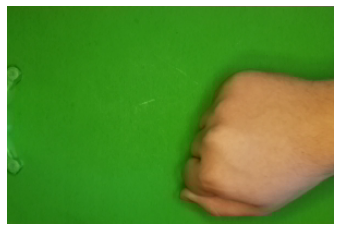

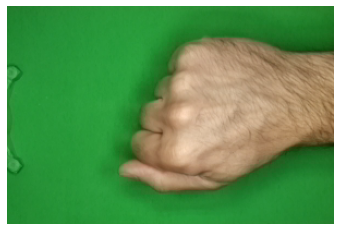

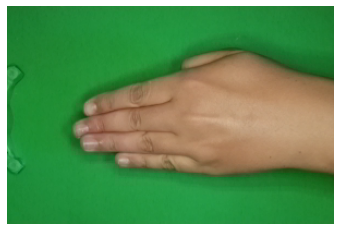

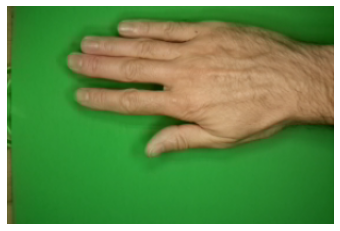

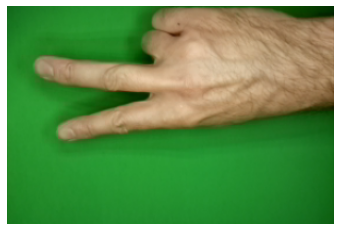

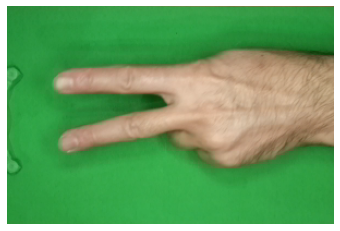

In [ ]:
b_berkas = os.listdir(batu_dir)
k_berkas = os.listdir(kertas_dir)
g_berkas = os.listdir(gunting_dir)

gambar_index = 2

g_r = [os.path.join(batu_dir, fname) 
                for fname in b_berkas[gambar_index-2:gambar_index]]
g_p = [os.path.join(kertas_dir, fname) 
                for fname in k_berkas[gambar_index-2:gambar_index]]
g_s = [os.path.join(gunting_dir, fname) 
                for fname in g_berkas[gambar_index-2:gambar_index]]

for i, gambar_path in enumerate(g_r + g_p + g_s):
  pictures = mpimg.imread(gambar_path)
  plt.imshow(pictures)
  plt.axis(False)
  plt.show()

In [ ]:
r_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock')
print('\nTotal Gambar Rock adalah :', len(os.listdir(r_dir)))


Total Gambar Rock adalah : 726


In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [ ]:
p_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
print('Total Keseluruhan Gambar Paper adalah :', len(os.listdir(p_dir)))

Total Keseluruhan Gambar Paper adalah : 712


In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [ ]:
s_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')
print('Total  Gambar Scissors adalah :', len(os.listdir(s_dir)))

Total  Gambar Scissors adalah : 750


In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [ ]:
print('Jumlah Keseluruhan:', len(os.listdir(r_dir))+len(os.listdir(p_dir))+ len(os.listdir(s_dir)))

Jumlah Keseluruhan: 2188


In [ ]:
# membuat image data generator

training_data = ImageDataGenerator(
    rescale = 1./225,
      rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest')

testing_data = ImageDataGenerator(
    rescale = 1./225,
      rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
training_gen = training_data.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_gen = testing_data.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(
    training_gen,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_gen,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 42s - loss: 1.1237 - accuracy: 0.3938 - val_loss: 1.0107 - val_accuracy: 0.4875
Epoch 2/20
25/25 - 41s - loss: 0.7921 - accuracy: 0.6325 - val_loss: 0.3928 - val_accuracy: 0.8562
Epoch 3/20
25/25 - 41s - loss: 0.4344 - accuracy: 0.8512 - val_loss: 0.2412 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 42s - loss: 0.2957 - accuracy: 0.8963 - val_loss: 0.2324 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 41s - loss: 0.2692 - accuracy: 0.9112 - val_loss: 0.2571 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 41s - loss: 0.3053 - accuracy: 0.8913 - val_loss: 0.1982 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 41s - loss: 0.2004 - accuracy: 0.9225 - val_loss: 0.1802 - val_accuracy: 0.9312
Epoch 8/20
25/25 - 41s - loss: 0.2377 - accuracy: 0.9175 - val_loss: 0.1957 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 40s - loss: 0.1788 - accuracy: 0.9475 - val_loss: 0.1547 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 43s - loss: 0.1756 - accuracy: 0.9438 - val_loss: 0.2542 - val_accuracy: 0.9000
Epoch 11/

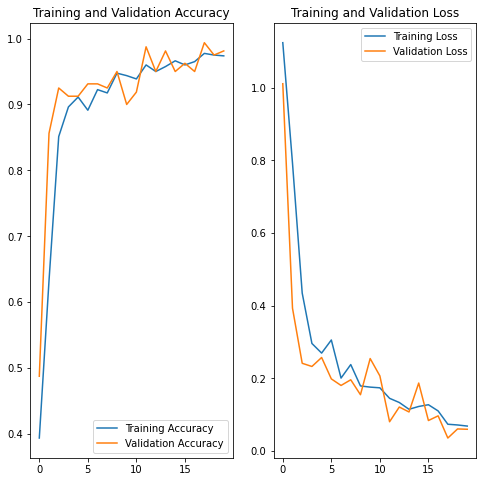

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy Data')
plt.plot(epochs_range, val_acc, label='Validation Accuracy Data')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss Data')
plt.plot(epochs_range, val_loss, label='Validation Loss Data')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


plt.show()

Saving 1Dfw5FRlS4h60JPX.png to 1Dfw5FRlS4h60JPX.png
1Dfw5FRlS4h60JPX.png
paper


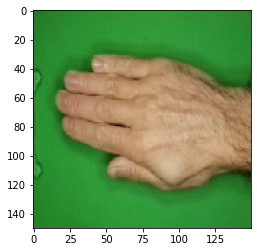

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  
  from PIL import ImageFile
  ImageFile.LOAD_TRUNCATED_IMAGES = True

  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  p = image.img_to_array(img)
  p = np.expand_dims(p, axis=0)

  images = np.vstack([p])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')